#  Prévision des Montants de Financement Participatif

Notre entreprise souhaite améliorer la précision de ses prévisions concernant les montants de financement participatif obtenus. Pour cela, nous avons besoin d'une analyse approfondie et comparative des différents modèles de régression disponibles.

**Objectif** : **Évaluer et comparer plusieurs modèles de régression afin de déterminer celui qui offre la meilleure performance pour prédire les montants de financement participatif.**


## Re-contextualisation de la mission

Le but de notre étude consiste à améliorer la précision des prévisions des montants de financement participatif d’une  entreprise dans le crowfunding. Pour parvenir à une telle réalisation, nous utiliserons des modèles à base d'arbre et de régression afin d’optimiser  des montants de financement participatif.

## Importation des bibliothèques pour notre étude de données

In [4]:
# importation de la base de données
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

## Importation de la base de données

In [5]:
# importation de la base de données
unknowndata= pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\Projet Informatique\Base Crowdfunding_2.xlsx')
unknowndata #affichage des données du jeu de données

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Type de financement,Revenus nets (en milliers d'€)
0,1,200,55,equity crowdfunding,400
1,2,400,37,reward crowdfunding,500
2,3,500,76,crowdlending,700
3,4,500,35,reward crowdfunding,350
4,5,270,15,equity crowdfunding,500
5,6,400,27,reward crowdfunding,500
6,7,300,15,crowdlending,430
7,8,700,40,reward crowdfunding,780
8,9,210,23,equity crowdfunding,300
9,10,250,12,crowdlending,430


## 1. Traitement de la base de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   ID_des entreprises                                      44 non-null     int64 
 1   Chiffres d'affaires (en milliers d'€)                   44 non-null     int64 
 2   Montant de financement participatif  (en milliers d'€)  44 non-null     int64 
 3   Type de financement                                     44 non-null     object
 4   Revenus nets  (en milliers d'€)                         44 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.8+ KB
Le jeu de données comporte 0 doublons


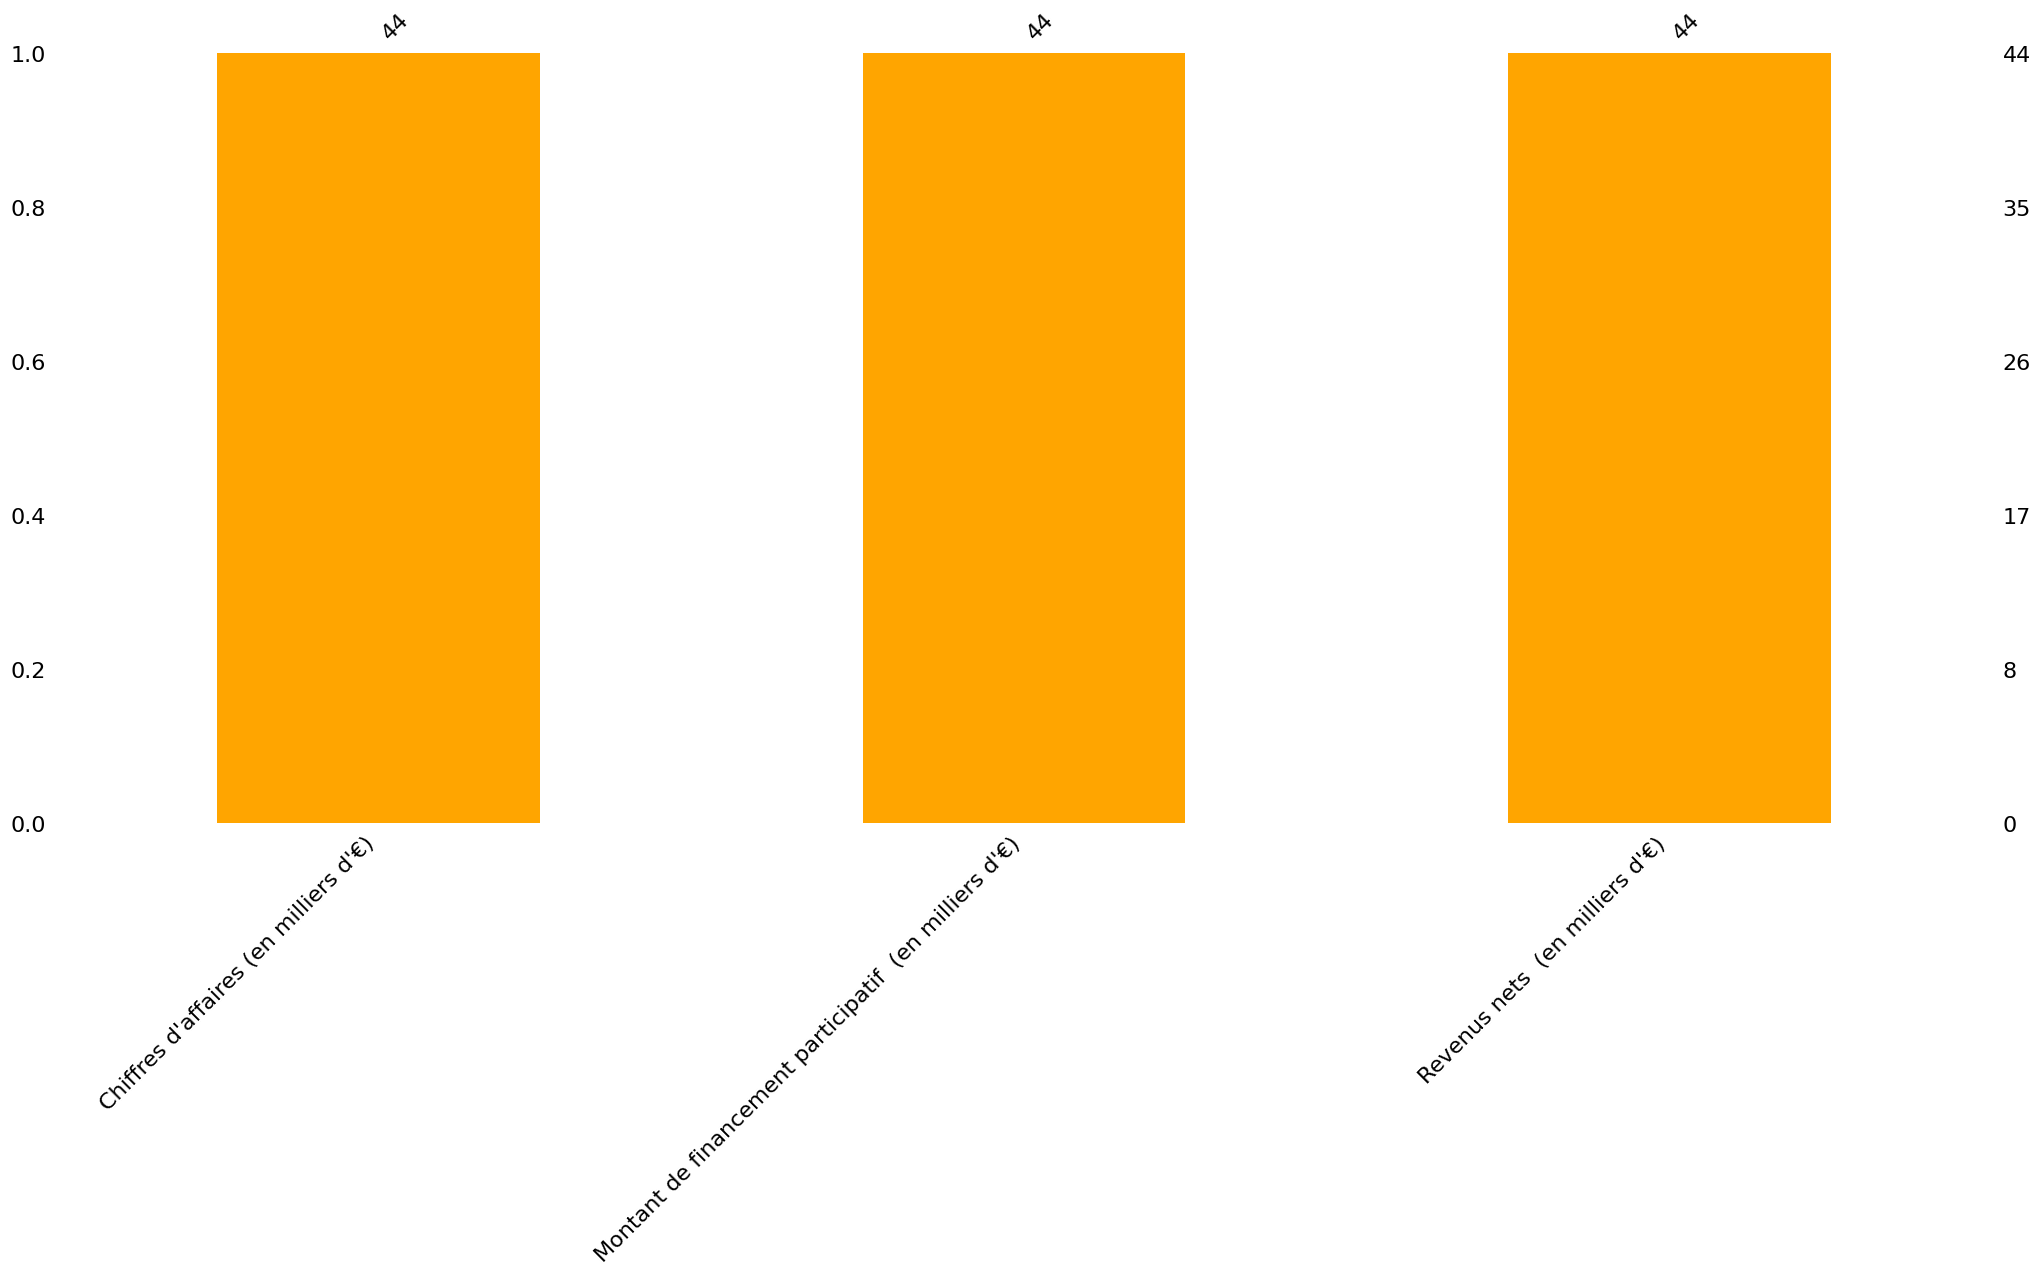

In [7]:
#résumé sur le dataset
infodata=unknowndata.info()
infodata #afficher les résumés sur la base de données

#suppression de certaines variables inutiles pour notre modelisation
unknowndata = unknowndata.drop(columns=['ID_des entreprises','Type de financement  ']) 
unknowndata

#afficher les valeurs manquantes
msno.bar(unknowndata, color='orange')

#afficher les doublons
duplicatedata= unknowndata.duplicated().sum()
print ( "Le jeu de données comporte",  duplicatedata, "doublons") 

Le jeu de données founit par l'entreprise contient peu de données. En effet, nous avons eu précisément 43 observations, qui ne contiennent ni des doublons et ni des valeurs manquantes selon le graphique qui affichent les valeurs de chaque variable. De plus, la base de données regorge 03 variables pour l'étude, il s'agit : 

- de la variable "**chiffre d'affaire**" qui contient le chiffre d'affaire qu'à réaliser cette entreprise le mois passé;

- de la variabble "**revenus nets**". Pour le mois passé, elle affirme que cette variable est très importante dans le but de l'aider pour réaliser la prédiction. Ces informations sont recueillies selon le service statistique de l"entreprise, qui s'occupe de  la qualité des données enregistrées au sein de l'entreprise. 
    
- enfin, de la variable "**montant de financement participatif**"

Le service stattistique de l'entreprise estime que ces 03 variables sont suffisantes pour notre modelisation. Le temps de confirmer cela, vérifions si la base de données présente des valeurs extrêmes. 

### 1.1 Détection des outiers dans la base de données


In [8]:
# détection des outliers avec la méthode iqr
Q1 = unknowndata.quantile(0.25)
Q3 = unknowndata.quantile(0.75)
IQR = Q3-Q1
outliers=((unknowndata<(Q1-1.5*IQR))|(unknowndata >(Q3+1.5*IQR)))
valeurs_aberrantes=unknowndata[outliers.any(axis=1)]

# affichage des résultats
print("les valeurs aberrantes sont : ")
valeurs_aberrantes

les valeurs aberrantes sont : 


,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
19,980,200,990
25,978,210,995


Les résultats affichés, après la **méthode IQR** utilisée, montre que les valeurs des lignes 19 et 25 de notre base de données sont des outliers qui pourraient  compromettre  notre modélisation et l'évaluation des performances de notre modèle. Ainsi, pour éviter cela, nous supprimerons ces deux lignes pour augmenter la robustesse de notre modèle.

In [9]:
# suppression des lignes contenant des outliers
unknowndata= unknowndata.drop(valeurs_aberrantes.index)

## 2. Analyse exploratoire des données (EDA)

### 2.1. Statistique descriptive et graphique de la matrice de corrélation


In [11]:
#afficher la statistique
stat=unknowndata.describe()
stat 


,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
count,42.000000,42.000000,42.000000
mean,523.809524,67.476190,633.452381
std,246.027288,29.057754,214.026805
min,200.000000,12.000000,300.000000
25%,341.250000,46.250000,462.500000
50%,456.500000,67.000000,627.500000
75%,756.250000,89.750000,800.000000
max,987.000000,125.000000,999.000000


<Axes: >

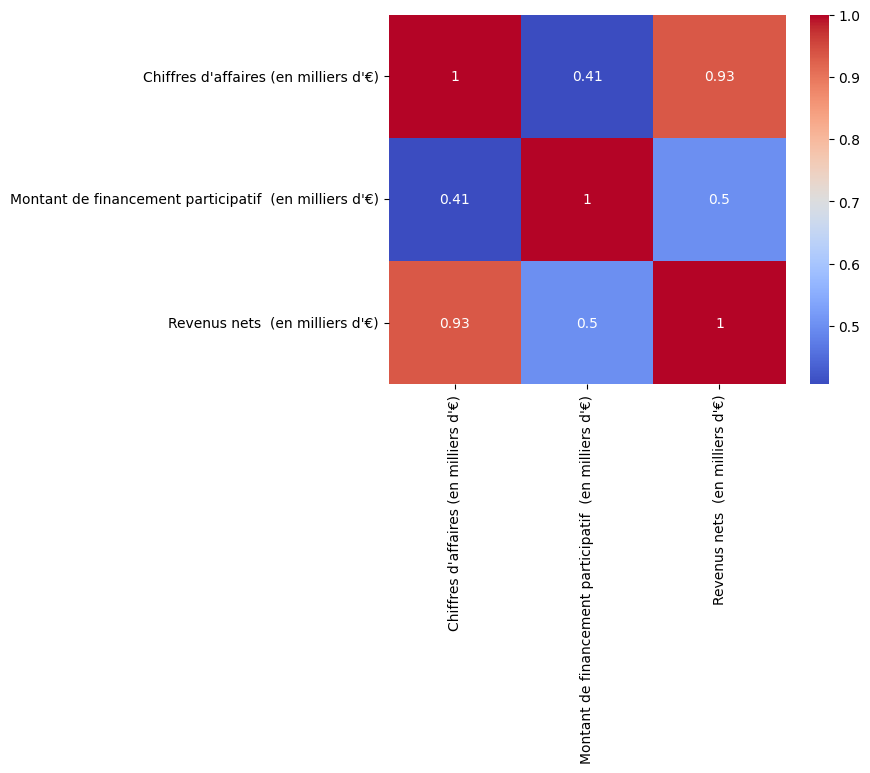

In [12]:
#matrice de corrélation
corree= unknowndata.corr()

#afficher la matrice de corrélation sous forme graphique
sns.heatmap(corree, annot=True, cmap='coolwarm')

La variable **montant de financement participatif** est notre variable à prédire et les autres comme **chiffre d'affaire** et les **revenus nets** sont des prédicteurs. La matrice de corrélation, selon notre variable cible, montre que le chiffre d'affaire et les revenus nets présentent toute une légère corrélation positive (0.41) et (0.5). On peut conclure que les revenus nets sont plus prédictifs que le chiffre d'affaire généré par l'entreprise.

### 2.2. Visualisation des données 

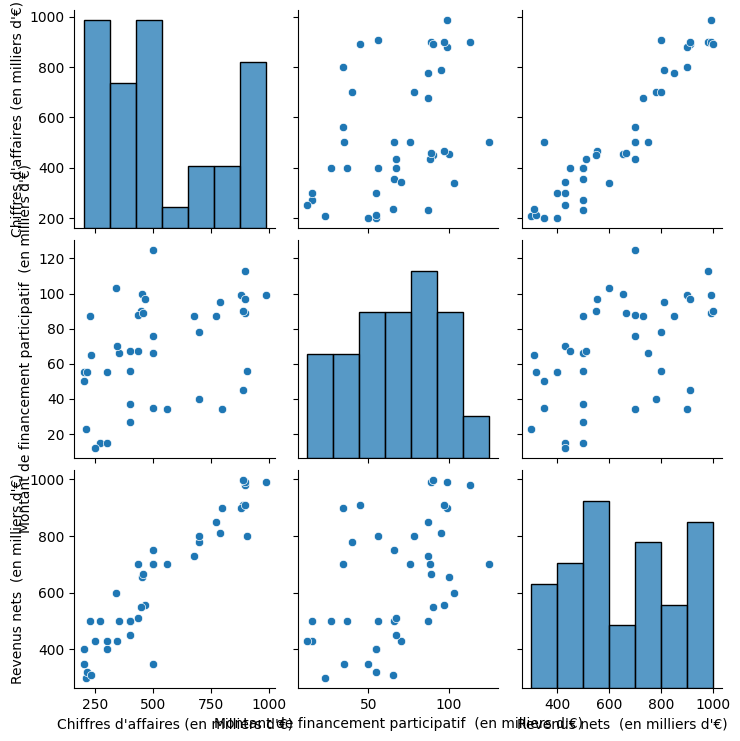

In [13]:
#visualisation graphique des données
sns.pairplot(unknowndata)
plt.show()

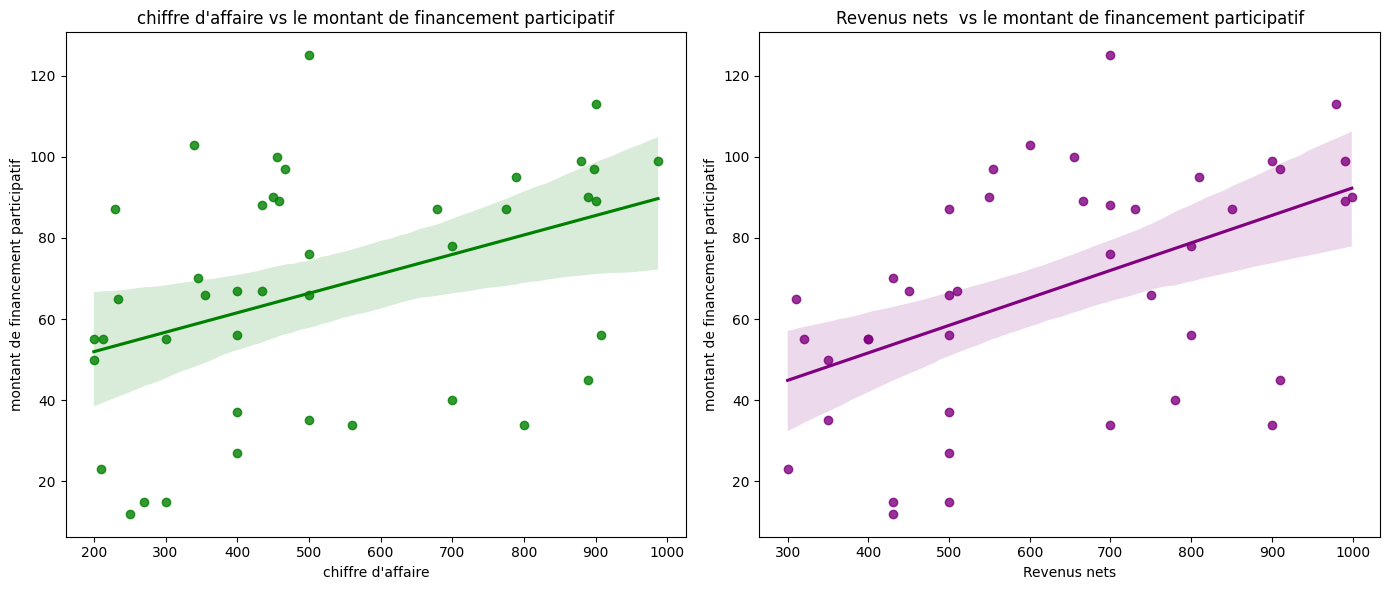

In [14]:
# relation entre la variable à prédire et les prédicteurs
fig, ax=plt.subplots(1,2, figsize=(14,6))
sns.regplot(data=unknowndata, x='Chiffres d\'affaires (en milliers d\'€)', y= 'Montant de financement participatif  (en milliers d\'€)', color='green', ax=ax[0])
ax[0].set(
    title=('chiffre d\'affaire vs le montant de financement participatif'),
    xlabel=('chiffre d\'affaire'),
    ylabel=('montant de financement participatif')
)

sns.regplot(data=unknowndata, x='Revenus nets  (en milliers d\'€)', y= 'Montant de financement participatif  (en milliers d\'€)', color='purple', ax=ax[1])
ax[1].set(
    title=('Revenus nets  vs le montant de financement participatif'),
    xlabel=('Revenus nets'),
    ylabel=('montant de financement participatif')
)

plt.tight_layout()
plt.show()

### 2.3. Relation entre la cible et les prédicteurs

Ajouter des résultats sur la matrice de corrélation, la visualisation faite sur la relation entre la variable cible et les prédicteurs montre de plus, que les revenus nets sont plus prédictifs que les chiffres d'affaires. L'entreprise devrait dès lors être plus regardant sur ces revenus nets, car cette variable présente vraiment des informations très utiles qui pourraient l'aider dans sa prévision.

### 2.4. Normalisation des données

Normaliser les données est une des étapes cruciales pour corriger les biais qu'on pourrait en avoir durant la modélisation et l'évaluation des performances prédictives.

In [15]:
# Normalisation
variables =['Chiffres d\'affaires (en milliers d\'€)','Montant de financement participatif  (en milliers d\'€)', 'Revenus nets  (en milliers d\'€)']
min_max_scaler = MinMaxScaler()
data_normalized = unknowndata.copy()
data_normalized[variables] = min_max_scaler.fit_transform(unknowndata[variables])

## 3. Modelisation et performance prédictive

### 3.1. Division des données en sous-ensemble d'entraînement et de test

In [16]:
# Préparation des données normalisées pour l'entraînement et l'évaluation prédicitve
x = data_normalized.drop(columns=['Montant de financement participatif  (en milliers d\'€)']) # les prédicteurs
y= data_normalized['Montant de financement participatif  (en milliers d\'€)'] #variable à prédire

#division des données normalisées en sous-ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=808)

# Ajout des constants
x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

### 3.2. Entraînement du modèle, par la regression linéaire, un modèle simple

In [19]:
# entraînement du modèle
model = sm.OLS(y_train, x_train_const).fit()
print(model.summary())

                                              OLS Regression Results                                              
Dep. Variable:     Montant de financement participatif  (en milliers d'€)   R-squared:                       0.318
Model:                                                                OLS   Adj. R-squared:                  0.273
Method:                                                     Least Squares   F-statistic:                     6.993
Date:                                                    Tue, 02 Jul 2024   Prob (F-statistic):            0.00321
Time:                                                            22:02:22   Log-Likelihood:                 5.4522
No. Observations:                                                      33   AIC:                            -4.904
Df Residuals:                                                          30   BIC:                           -0.4149
Df Model:                                                               2       

#### Interprétation des résultats de la régression linéaire

- R-carré (0.318) : Cela indique qu'environ 31,8 % de la variabilité de la variable dépendante (Montant de financement participatif) peut être expliquée par les variables indépendantes du modèle (Chiffres d'affaires et Revenus nets).

- R-carré ajusté (0.273) : Cela ajuste la valeur du R-carré en fonction du nombre de prédicteurs dans le modèle. Il est légèrement inférieur au R-carré, ce qui indique que l'ajout de plus de prédicteurs n'améliore pas significativement l'ajustement du modèle.

- F-statistic (6.993) et Probabilité (F-statistic) (0.00321) : La F-statistic teste si au moins un des prédicteurs a un coefficient non nul. Une p-value de 0.00321 indique que le modèle est statistiquement significatif et qu'au moins un prédicteur est utile pour prédire la variable dépendante.

#### Coefficients

- Constante (0.2756) : C'est l'interception de la ligne de régression. Lorsque tous les prédicteurs sont égaux à zéro, la valeur attendue de la variable dépendante est de 0.2756 (en milliers d'€).

- Chiffres d'affaires (coef: -0.2204, p-value: 0.527)  : Ce coefficient n'est pas statistiquement significatif (p-value > 0.05), ce qui indique que le Chiffres d'affaires n'a pas d'effet significatif sur le Montant de financement participatif.

- Revenus nets (coef: 0.6273, p-value: 0.074) : Ce coefficient est marginalement significatif (p-value < 0.1), ce qui suggère que les Revenus nets pourraient avoir un effet positif sur le Montant de financement participatif. Une augmentation d'une unité des Revenus nets (en milliers d'€) est associée à une augmentation de 0.6273 unités du Montant de financement participatif, bien que ce résultat doive être interprété avec prudence en raison de la p-value légèrement supérieure au seuil de 0.05.

#### Tests Diagnostiques

- Tests d'Omnibus et de Jarque-Bera (JB) : Ces tests vérifient la normalité des résidus. Des p-values supérieures à 0.05 (0.227 pour Omnibus et 0.266 pour JB) suggèrent que les résidus sont normalement distribués.

- Durbin-Watson (1.504) : Cette statistique teste l'autocorrélation des résidus. Une valeur proche de 2 indique l'absence d'autocorrélation. Une valeur de 1.504 suggère une autocorrélation positive légère, mais non sévère.

- Numéro de condition (15.7) : Cela mesure la multicolinéarité. Des valeurs supérieures à 30 indiquent des problèmes potentiels de multicolinéarité. Une valeur de 15.7 ne suggère pas de sérieux problèmes de multicolinéarité.




### 3.3. Evaluation de la performance prédictive

In [20]:
# prédiction
y_pred = model.predict(x_test_const)

# évaluation de la performance prédictive
print("RMSE",mean_squared_error(y_test, y_pred))
print("MAPE",mean_absolute_percentage_error(y_test, y_pred))

RMSE 0.06536238546260434
MAPE 2.0029689286180115


#### Performances du Modèle

- RMSE (Erreur quadratique moyenne) : 0.0654  : C'est l'écart-type des résidus. Des valeurs plus faibles indiquent un meilleur ajustement.
- MAPE (Erreur absolue moyenne en pourcentage) : 2.003 : Cela mesure la précision du modèle en termes de pourcentages d'erreurs. Une valeur plus faible indique une meilleure précision prédictive.

#### Resumé sur la capacité prédictive  avec la regression linéaire 

Le modèle explique environ 31,8 % de la variance des montants de financement participatif avec une performance prédictive modérée. Les Revenus nets semblent avoir un effet positif marginalement significatif sur les montants de financement participatif, tandis que le Chiffres d'affaires n'a pas d'impact significatif. Les résidus du modèle semblent être normalement distribués sans problèmes sérieux d'autocorrélation ou de multicolinéarité.


## 4. Amelioration de la robustesse du modèle

Dans ce cas, nous avons utilisé autres modèles comme les méthodes régularisées (les regressions ridge et lasso) et l'ensemble learning comme la forêt aléatoire

In [21]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
# Créer un scorer RMSE pour la validation croisée
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Modèles à tester
models = {
    'Linear Regression': sm.OLS(y_train, x_train_const),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=808)
}

# Evaluation des modèles
# Evaluation des modèles
print("Évaluation des modèles sur données normalisées:")
for name, model in models.items():
    if name == 'Linear Regression':
        results = model.fit().predict(x_test_const)
        score = rmse(y_test, results)
    else:
        model.fit(x_train_const, y_train)
        y_pred = model.predict(x_test_const)
        score = rmse(y_test, y_pred)
    print(f"{name}: RMSE = {score:.4f}")


Évaluation des modèles sur données normalisées:
Linear Regression: RMSE = 0.2557
Ridge Regression: RMSE = 0.2706
Lasso Regression: RMSE = 0.2740
Random Forest: RMSE = 0.2644


#### Évaluation des Modèles sur Données Normalisées

L'évaluation des différents modèles de régression sur les données normalisées a donné les résultats suivants pour la Root Mean Squared Error (RMSE) :
Interprétation des Résultats

- **Linear Regression** (RMSE = 0.2557) : Ce modèle a la plus basse valeur de RMSE parmi tous les modèles testés, ce qui indique qu'il a le meilleur ajustement aux données. Cela signifie que la régression linéaire simple est la plus précise pour prédire les montants de financement participatif sur les données normalisées.

- **Ridge Regression** (RMSE = 0.2706)  : Ce modèle ajoute une régularisation L2 pour pénaliser les grands coefficients, ce qui peut aider à prévenir le sur-apprentissage. Bien que le RMSE soit légèrement plus élevé que celui de la régression linéaire simple, la différence n'est pas très significative. La Ridge Regression peut être préférable si l'on souhaite un modèle légèrement plus robuste contre les sur-ajustements.

- **Lasso Regression** (RMSE = 0.2740) : Ce modèle ajoute une régularisation L1, qui peut entraîner la réduction à zéro de certains coefficients. Bien que son RMSE soit légèrement supérieur à celui de la Ridge Regression, la Lasso Regression peut être utile si l'on cherche à effectuer une sélection de variables, car elle tend à produire des modèles plus simples en éliminant les variables moins importantes.

- **Random Forest** (RMSE = 0.2644) : Ce modèle non linéaire et basé sur un ensemble d'arbres de décision montre une performance relativement bonne avec un RMSE inférieur à ceux des Ridge et Lasso, mais supérieur à la régression linéaire. Les modèles de Random Forest sont utiles lorsqu'il y a des interactions complexes entre les variables, même si dans ce cas, la régression linéaire a montré une meilleure performance.

#### Ce qu'on peut retenir

Sur la base des valeurs de RMSE, la « **régression linéaire** » est le modèle le plus performant pour prédire les montants de financement participatif sur les données normalisées. Cependant, les autres modèles peuvent offrir des avantages spécifiques :

- Ridge Regression : Une meilleure robustesse contre le sur-ajustement.

- Lasso Regression : Une sélection de variables simplifiée.

- Random Forest : Une modélisation des interactions complexes entre les variables.

La sélection du modèle idéal dépendra des objectifs spécifiques de l'analyse et des priorités entre la précision prédictive et la simplicité/interprétabilité du modèle.


### 4.1. Validation croisée sur la regression linéaire

In [22]:
# Définition du modèle de régression linéaire
model = LinearRegression()

# Validation croisée pour évaluer la performance du modèle
cv_scores = cross_val_score(model, x_train_const, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Affichage des scores de validation croisée
print("Scores de RMSE pour chaque fold de la validation croisée : ", cv_rmse_scores)
print("RMSE moyen de la validation croisée : ", cv_rmse_scores.mean())

Scores de RMSE pour chaque fold de la validation croisée :  [0.17683309 0.29384005 0.21501135 0.24392528 0.20099148]
RMSE moyen de la validation croisée :  0.22612025084773527


Les scores de RMSE obtenus pour chaque fold de la validation croisée sont les suivants : 

- Fold 1 : 0.1768
- Fold 2 : 0.2938
- Fold 3 : 0.2150
- Fold 4 : 0.2439
- Fold 5 : 0.2010

Le RMSE moyen de la validation croisée est de 0.2261.

#### Interprétation des Résultats :

Le RMSE (Root Mean Squared Error) mesure la précision de la régression linéaire en termes d'écart moyen entre les valeurs réelles observées et celles prédites par le modèle. Plus le RMSE est bas, meilleure est la capacité du modèle à prédire avec précision les valeurs cibles.

- RMSE Moyen : Avec un RMSE moyen de 0.2261, cela signifie que, en moyenne, les prédictions du modèle sont éloignées de 0.2261 unités de la variable cible (en milliers d'€ dans votre contexte) par rapport aux valeurs réelles. C'est une mesure importante pour évaluer à quel point votre modèle de régression linéaire est performant.

- Variabilité entre les Folds : On observe une certaine variabilité dans les scores de RMSE entre les différents folds de la validation croisée. Cela peut indiquer que le modèle peut être plus précis sur certains sous-ensembles de données (folds) que sur d'autres, ce qui est normal en raison de la variabilité des données d'apprentissage.

#### Ce qu'on conclut :

Avec un RMSE moyen de 0.2261, votre modèle de régression linéaire semble être raisonnablement précis pour prédire les montants de financement participatif. Vous pouvez utiliser ces résultats pour comparer avec d'autres modèles, ajuster votre approche si nécessaire, et enfin formuler des recommandations basées sur les prévisions de votre modèle pour votre projet ou votre entreprise.


### 4.2. Optimission des hyperparamètres pour améliorer la robustesse des modèles 

In [23]:
# Définir le modèle de forêt aléatoire
model_rf = RandomForestRegressor(random_state=808)

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10]  # Nombre minimum d'échantillons requis pour scinder un nœud
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(x_train_const, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Obtenez le meilleur modèle
best_model_rf = grid_search.best_estimator_
print(best_model_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres trouvés :
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestRegressor(min_samples_split=10, random_state=808)


### 4.3. Validation croisée après optimisation des hyperparamètres

In [24]:
# Définir la validation croisée (par exemple, K-Fold avec K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=808)

# Liste pour stocker les résultats de la validation croisée
cv_results = []

# Effectuer la validation croisée
for train_index, val_index in kf.split(x_train_const):
    x_train_fold, x_val_fold = x_train_const.iloc[train_index], x_train_const.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Entraîner le meilleur modèle sur le pli actuel
    best_model_rf.fit(x_train_fold, y_train_fold)
    
    # Faire des prédictions sur l'ensemble de validation
    y_pred_fold = best_model_rf.predict(x_val_fold)
    
    # Calculer l'erreur quadratique moyenne sur l'ensemble de validation
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    cv_results.append(fold_rmse)

# Calculer la moyenne et l'écart-type des résultats de validation croisée
mean_cv_rmse = np.mean(cv_results)
std_cv_rmse = np.std(cv_results)

print(f"Validation croisée RMSE moyenne : {mean_cv_rmse:.4f} +/- {std_cv_rmse:.4f}")

Validation croisée RMSE moyenne : 0.2201 +/- 0.0227


### 4.4. Comparons les résultats de la validation croisée entre la régression linéaire et la forêt aléatoire :

#### Régression Linéaire :
- Validation croisée RMSE moyen : 0.2261

#### Forêt Aléatoire (Random Forest) :
- Meilleurs hyperparamètres trouvés : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
- Validation croisée RMSE moyenne : 0.2201 +/- 0.0227

#### Interprétation et Comparaison :

1. **RMSE Moyen :**
   - Régression Linéaire : RMSE moyen de 0.2261.
   - Forêt Aléatoire : RMSE moyen de 0.2201.

   La forêt aléatoire montre un RMSE moyen légèrement inférieur à celui de la régression linéaire, ce qui indique une performance légèrement meilleure en termes de précision prédictive pour les montants de financement participatif.

2. **Variabilité (Écart-Type) :**
   - Forêt Aléatoire : Écart-type de 0.0227.

   La forêt aléatoire présente également une variabilité (écart-type) de 0.0227 autour de la moyenne du RMSE, ce qui indique une certaine stabilité dans la performance du modèle sur les différents sous-ensembles de données.



#### Ce que nous retenons :

- La forêt aléatoire semble être plus performante que la régression linéaire en termes de RMSE moyen, ce qui suggère qu'elle est mieux adaptée pour prédire les montants de financement participatif dans votre contexte.
- Cependant, il est important de considérer d'autres aspects tels que la complexité du modèle, l'interprétabilité des résultats, et les ressources nécessaires à l'entraînement et à la prédiction.
- Vous pouvez utiliser ces résultats pour prendre une décision éclairée sur le choix du modèle à utiliser en fonction de vos objectifs spécifiques et des critères de performance importants pour votre projet ou votre entreprise.


## 5. Recommandations basées sur les Résultats de l'Analyse

1. **Choix du Modèle :**
   - **Régression Linéaire :** Recommandez l'utilisation de la régression linéaire pour prédire les montants de financement participatif. Bien qu'elle soit légèrement moins performante que la forêt aléatoire en termes de RMSE moyen, elle offre une interprétabilité directe des coefficients et peut être plus facile à comprendre pour les décideurs.

2. **Prévisions :**
   - Utilisez le modèle de régression linéaire pour fournir des prévisions précises des montants de financement participatif. Mentionnez que le modèle explique environ 31,8 % de la variance des montants de financement participatif, ce qui indique une capacité modérée à prédire ces valeurs.

3. **Facteurs Impactants :**
   - Soulignez que les Revenus nets semblent avoir un effet positif marginal sur les montants de financement participatif, bien que le chiffre d'affaires n'ait pas montré de relation significative dans ce contexte. Suggérez de surveiller les variations des Revenus nets comme un indicateur potentiel de l'évolution des montants de financement participatif.

4. **Améliorations Potentielles :**
   - **Optimisation des Hyperparamètres :** Proposez d'explorer l'optimisation des hyperparamètres pour affiner encore la performance du modèle de régression linéaire. Cela pourrait inclure l'ajustement des paramètres tels que la régularisation et d'autres paramètres spécifiques au modèle.

5. **Validation Continue :**
   - Encouragez la validation continue du modèle sur de nouvelles données pour assurer sa robustesse et son adaptabilité à des situations futures. Cela permettra de vérifier la stabilité des prévisions et d'ajuster le modèle si nécessaire.

## Finalement

Recommandez à l'entreprise d'adopter la régression linéaire pour ses prévisions de montants de financement participatif, en mettant en avant sa capacité à offrir des prédictions précises tout en restant facilement interprétable. Encouragez également l'exploration continue des possibilités d'amélioration du modèle et la vigilance quant aux changements dans les variables pertinentes. Ces recommandations visent à soutenir les décisions stratégiques de l'entreprise en matière de gestion financière et de planification à long terme.
